<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target</a></span></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Visualize-Random-Forests" data-toc-modified-id="Visualize-Random-Forests-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualize Random Forests</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Baseline-with-Numerical-Data" data-toc-modified-id="Baseline-with-Numerical-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline with Numerical Data</a></span><ul class="toc-item"><li><span><a href="#pageDepth-+-sessionCount-+-daysSinceLastLession" data-toc-modified-id="pageDepth-+-sessionCount-+-daysSinceLastLession-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>pageDepth + sessionCount + daysSinceLastLession</a></span></li><li><span><a href="#pageDepth-+-sessionCount" data-toc-modified-id="pageDepth-+-sessionCount-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>pageDepth + sessionCount</a></span></li></ul></li><li><span><a href="#Baseline-+-productSKU_cete" data-toc-modified-id="Baseline-+-productSKU_cete-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Baseline + productSKU_cete</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Classifier" data-toc-modified-id="Classifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Classifier</a></span></li></ul></li><li><span><a href="#Baseline-+-productSKU_cete-+-'dateHourMinute'" data-toc-modified-id="Baseline-+-productSKU_cete-+-'dateHourMinute'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Baseline + productSKU_cete + 'dateHourMinute'</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Month" data-toc-modified-id="Month-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Month</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Classifier" data-toc-modified-id="Classifier-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Classifier</a></span></li></ul></li><li><span><a href="#Day-of-week" data-toc-modified-id="Day-of-week-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Day of week</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.3.3.1"><span class="toc-item-num">3.3.3.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Classifier" data-toc-modified-id="Classifier-3.3.3.2"><span class="toc-item-num">3.3.3.2&nbsp;&nbsp;</span>Classifier</a></span></li></ul></li><li><span><a href="#Hour" data-toc-modified-id="Hour-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Hour</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Classifier" data-toc-modified-id="Classifier-3.3.4.2"><span class="toc-item-num">3.3.4.2&nbsp;&nbsp;</span>Classifier</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from scipy import stats
import statsmodels.api as sm
import os
from IPython.display import Image
import pydotplus
from sklearn import tree

## DATA

### Dataset

In [2]:
data_root="../data/"
datafile=os.path.join(data_root,'dfjoin_Scount_daysSLS_srceMed_city_device_OS_2019_2020_jan21.csv')
df=pd.read_csv(datafile)
print(df.shape)
df.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3936941, 15)


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:city,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,1008,201904301452,/parafarmacia/es/,1,1,0,(direct) / (none),Burgos,mobile,iOS,1,0,0,0
1,1,1008,201904301524,/parafarmacia/es/,3,1,0,(direct) / (none),Madrid,desktop,Windows,1,0,0,0
2,2,1008,201904301545,/parafarmacia/es/,7,33,0,merchants.google.com / referral,Zamudio,desktop,Windows,1,0,0,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(3936941, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 14 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:dateHourMinute        int64 
 2   ga:pagePath              object
 3   ga:pageDepth             int64 
 4   ga:sessionCount          int64 
 5   ga:daysSinceLastSession  int64 
 6   ga:sourceMedium          object
 7   ga:city                  object
 8   ga:deviceCategory        object
 9   ga:operatingSystem       object
 10  ga:productListViews      int64 
 11  ga:productListClicks     int64 
 12  ga:productDetailViews    int64 
 13  ga:productAddsToCart     int64 
dtypes: int64(8), object(6)
memory usage: 420.5+ MB


### Target

In [4]:
df['ga:productAddsToCart_transf']=df["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

print("No. observations per class")
print(df['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    3864256
1      72685
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    98.15377
1     1.84623
Name: ga:productAddsToCart_transf, dtype: float64


## Functions

### Model evaluation

In [5]:
def evaluate(classifier,X_train, X_test, y_train, y_test):
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)
    print("TRAINING SCORE: " + str(classifier.score(X_train,y_train)))
    print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
    print("PRECISION: " + str(precision_score(y_test, predictions)))
    print("RECALL: " + str(recall_score(y_test, predictions)))
    print("F1 SCORE: " + str(f1_score(y_test, predictions)))
    print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

    tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
    plt.plot(tpr, fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

### Visualize Random Forests

https://programmerbackpack.com/introduction-to-random-forests-classifier-and-step-by-step-sklearn-implementation/

In [32]:
# ver con funcion SEBAS
## REVISAR Y VER XQ NO FUNCIONA O BUSCA OTRA FUNCION

def printTree(feature_names,classifier, index):
    
    target_names = ['Yes', 'No']
    
    # Build the daya
    dot_data = tree.export_graphviz(classifier, out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names)
    # Build the graph
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Write the image
    Image(graph.create_png())
    graph.write_png("tree" + str(index) + ".png")
    
for index in range(len(classifier.estimators_)):
    printTree(list(X_train.columns),classifier.estimators_[index],index)

## Random Forest

### Baseline with Numerical Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 15 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   ga:productSKU                object
 1   ga:dateHourMinute            int64 
 2   ga:pagePath                  object
 3   ga:pageDepth                 int64 
 4   ga:sessionCount              int64 
 5   ga:daysSinceLastSession      int64 
 6   ga:sourceMedium              object
 7   ga:city                      object
 8   ga:deviceCategory            object
 9   ga:operatingSystem           object
 10  ga:productListViews          int64 
 11  ga:productListClicks         int64 
 12  ga:productDetailViews        int64 
 13  ga:productAddsToCart         int64 
 14  ga:productAddsToCart_transf  int64 
dtypes: int64(9), object(6)
memory usage: 450.5+ MB


#### pageDepth + sessionCount + daysSinceLastLession

In [7]:
y=df['ga:productAddsToCart_transf']
X=df[['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

TRAINING SCORE: 0.9817198128495735
ACCURACY: 0.9813632096367132
PRECISION: 0.34545454545454546
RECALL: 0.007298068481123793
F1 SCORE: 0.014294158740394435
AUC: 0.6715584646541726


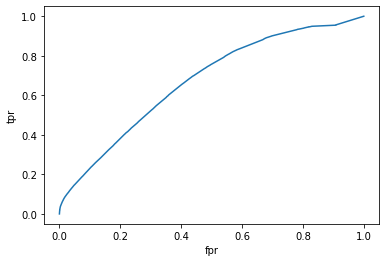

In [8]:
from sklearn.ensemble import RandomForestClassifier
clrf=RandomForestClassifier()
evaluate(clrf,X_train, X_test, y_train, y_test)

In [9]:
print(classification_report(y_test,clrf.predict(X_test)))
clrf_cm = confusion_matrix(y_test,clrf.predict(X_test))
clrf_cm

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    966012
           1       0.35      0.01      0.01     18224

    accuracy                           0.98    984236
   macro avg       0.66      0.50      0.50    984236
weighted avg       0.97      0.98      0.97    984236



array([[965760,    252],
       [ 18091,    133]])

#### pageDepth + sessionCount

In [10]:
y=df['ga:productAddsToCart_transf']
X=df[['ga:pageDepth','ga:sessionCount']]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

TRAINING SCORE: 0.9815978907476365
ACCURACY: 0.9814637952686145
PRECISION: 0.38095238095238093
RECALL: 0.001755926251097454
F1 SCORE: 0.003495739567402229
AUC: 0.6583420959224547


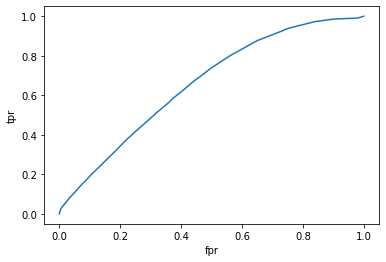

In [11]:
from sklearn.ensemble import RandomForestClassifier
clrf=RandomForestClassifier()
evaluate(clrf,X_train, X_test, y_train, y_test)

In [12]:
print(classification_report(y_test,clrf.predict(X_test)))
clrf_cm = confusion_matrix(y_test,clrf.predict(X_test))
clrf_cm

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    966012
           1       0.38      0.00      0.00     18224

    accuracy                           0.98    984236
   macro avg       0.68      0.50      0.50    984236
weighted avg       0.97      0.98      0.97    984236



array([[965960,     52],
       [ 18192,     32]])

### Baseline + productSKU_cete

#### Feature Engineering

In [6]:
#Split data

y=df['ga:productAddsToCart_transf']
X=df[['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU']]
X['ga:productSKU']=X['ga:productSKU'].astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

<ipython-input-6-f6afa246b78b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ga:productSKU']=X['ga:productSKU'].astype('str')


In [7]:
# Target encoding of productSKU with train
import category_encoders as ce
encoder=ce.TargetEncoder(cols='ga:productSKU')
X_train['ga:productSKU_cete']=encoder.fit_transform(X_train['ga:productSKU'],y_train)
X_train.head(3)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
<ipython-input-7-aaea5a3bdc07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ga:productSKU_cete']=encoder.fit_transform(X_train['ga:productSKU'],y_train)


,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:productSKU,ga:productSKU_cete
2829355,2,1,0,6908,0.004168
3543383,3,82,0,6809,0.001287
1607926,1,1,0,1047,0.059557


In [8]:
# 'Dictionary' of productSKU target encoding
prod_target_encod= X_train[['ga:productSKU','ga:productSKU_cete']]
prod_target_encod['ga:productSKU']=prod_target_encod['ga:productSKU'].astype('str')
prod_target_encod.drop_duplicates(inplace=True)
print(prod_target_encod.shape)
prod_target_encod.head(3)

<ipython-input-8-84f3a6cf49cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_target_encod['ga:productSKU']=prod_target_encod['ga:productSKU'].astype('str')


(5478, 2)


<ipython-input-8-84f3a6cf49cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_target_encod.drop_duplicates(inplace=True)


,ga:productSKU,ga:productSKU_cete
2829355,6908,0.004168
3543383,6809,0.001287
1607926,1047,0.059557


In [9]:
# productSKU target encoding in test according to fitting on train set:
X_test = X_test.merge(prod_target_encod, left_on='ga:productSKU', right_on='ga:productSKU', how='left')
X_test.head(3)

,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:productSKU,ga:productSKU_cete
0,1,1,0,6925,0.024405
1,14,1,0,5111,0.024561
2,6,1,0,1175,0.048494


In [10]:
# Checking missing values in 'ga:productSKU_cete':

X_test[X_test['ga:productSKU_cete'].isna()]

,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:productSKU,ga:productSKU_cete
5923,1,1,0,3337,NaN
7664,3,1,0,4071,NaN
11857,14,1,0,3766,NaN
16871,17,6,0,1329,NaN
20717,2,6,4,3560,NaN
...,...,...,...,...,...
927182,1,1,0,3405,NaN
943391,6,2,0,1520-16,NaN
945034,2,9,0,3168,NaN
958608,18,1,0,1520,NaN


In [11]:
# Filling missing values in X_test with the mean of the means:

X_test['ga:productSKU_cete']=X_test['ga:productSKU_cete'].fillna(prod_target_encod['ga:productSKU_cete'].mean())
X_test[X_test['ga:productSKU_cete'].isna()]


,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:productSKU,ga:productSKU_cete


In [12]:
# Drop 'ga:productSKU' in both train and test datasets:

X_train=X_train.drop('ga:productSKU',axis=1)
X_test=X_test.drop('ga:productSKU',axis=1)

In [13]:
X_test.head(3)

,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:productSKU_cete
0,1,1,0,0.024405
1,14,1,0,0.024561
2,6,1,0,0.048494


In [14]:
X_train.head(3)

,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:productSKU_cete
2829355,2,1,0,0.004168
3543383,3,82,0,0.001287
1607926,1,1,0,0.059557


#### Classifier

TRAINING SCORE: 0.9843258977784777
ACCURACY: 0.9786260612292174
PRECISION: 0.10480472042708626
RECALL: 0.020467515364354698
F1 SCORE: 0.034246889776431165
AUC: 0.7279564771567083


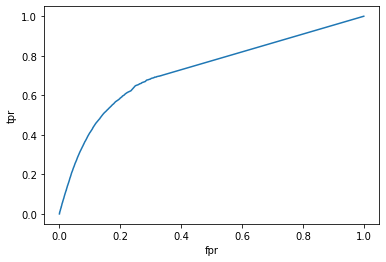

In [15]:
from sklearn.ensemble import RandomForestClassifier
clrf=RandomForestClassifier()
evaluate(clrf,X_train, X_test, y_train, y_test)

In [16]:
print(classification_report(y_test,clrf.predict(X_test)))
clrf_cm = confusion_matrix(y_test,clrf.predict(X_test))
clrf_cm

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    966012
           1       0.10      0.02      0.03     18224

    accuracy                           0.98    984236
   macro avg       0.54      0.51      0.51    984236
weighted avg       0.97      0.98      0.97    984236



array([[962826,   3186],
       [ 17851,    373]])

Un metodo más sofisticado de Target Encoding para evitar overfitting (mejores resultados en train que en test):

https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b
https://datascience.stackexchange.com/questions/81260/target-encoding-with-kfold-cross-validation-how-to-transform-test-set

### Baseline + productSKU_cete + 'dateHourMinute'

#### Feature Engineering

In [17]:
df['ga:dateHourMinute']

0          201904301452
1          201904301524
2          201904301545
3          201904301704
4          201904301452
               ...     
3936936    202101092123
3936937    202101092124
3936938    202101120607
3936939    202101131547
3936940    202101141618
Name: ga:dateHourMinute, Length: 3936941, dtype: int64

In [18]:
df['dateTime']=pd.to_datetime(df['ga:dateHourMinute'],format='%Y%m%d%H%M')
df['dateTime']

0         2019-04-30 14:52:00
1         2019-04-30 15:24:00
2         2019-04-30 15:45:00
3         2019-04-30 17:04:00
4         2019-04-30 14:52:00
                  ...        
3936936   2021-01-09 21:23:00
3936937   2021-01-09 21:24:00
3936938   2021-01-12 06:07:00
3936939   2021-01-13 15:47:00
3936940   2021-01-14 16:18:00
Name: dateTime, Length: 3936941, dtype: datetime64[ns]

In [19]:
df['dateTime_year']=df['dateTime'].dt.year
df['dateTime_month']=df['dateTime'].dt.month
df['dateTime_dayofweek']=df['dateTime'].dt.dayofweek
df['dateTime_hour']=df['dateTime'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   ga:productSKU                object        
 1   ga:dateHourMinute            int64         
 2   ga:pagePath                  object        
 3   ga:pageDepth                 int64         
 4   ga:sessionCount              int64         
 5   ga:daysSinceLastSession      int64         
 6   ga:sourceMedium              object        
 7   ga:city                      object        
 8   ga:deviceCategory            object        
 9   ga:operatingSystem           object        
 10  ga:productListViews          int64         
 11  ga:productListClicks         int64         
 12  ga:productDetailViews        int64         
 13  ga:productAddsToCart         int64         
 14  ga:productAddsToCart_transf  int64         
 15  dateTime                     datetime64[ns]
 16  

In [20]:
# DateTime as cyclical features:

df['month_sin']=np.sin((df.dateTime_month-1)*(2.*np.pi/12))
df['month_cos']=np.cos((df.dateTime_month-1)*(2.*np.pi/12))
# I substract minus 1 to 'df.dateTime_month' because its values are coded as 1 to 12 instead of 0 to 11

df['dayofweek_sin']=np.sin(df.dateTime_dayofweek*(2.*np.pi/7))
df['dayofweek_cos']=np.cos(df.dateTime_dayofweek*(2.*np.pi/7))

df['hour_sin']=np.sin(df.dateTime_hour*(2.*np.pi/24))
df['hour_cos']=np.cos(df.dateTime_hour*(2.*np.pi/24))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936941 entries, 0 to 3936940
Data columns (total 26 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   ga:productSKU                object        
 1   ga:dateHourMinute            int64         
 2   ga:pagePath                  object        
 3   ga:pageDepth                 int64         
 4   ga:sessionCount              int64         
 5   ga:daysSinceLastSession      int64         
 6   ga:sourceMedium              object        
 7   ga:city                      object        
 8   ga:deviceCategory            object        
 9   ga:operatingSystem           object        
 10  ga:productListViews          int64         
 11  ga:productListClicks         int64         
 12  ga:productDetailViews        int64         
 13  ga:productAddsToCart         int64         
 14  ga:productAddsToCart_transf  int64         
 15  dateTime                     datetime64[ns]
 16  

#### Month

##### Data

In [22]:
#Split data
y=df['ga:productAddsToCart_transf']
X=df[['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU','month_sin','month_cos']]
X['ga:productSKU']=X['ga:productSKU'].astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# Target encoding of productSKU with train
import category_encoders as ce
encoder=ce.TargetEncoder(cols='ga:productSKU')
X_train['ga:productSKU_cete']=encoder.fit_transform(X_train['ga:productSKU'],y_train)

# 'Dictionary' of productSKU target encoding
prod_target_encod= X_train[['ga:productSKU','ga:productSKU_cete']]
prod_target_encod['ga:productSKU']=prod_target_encod['ga:productSKU'].astype('str')
prod_target_encod.drop_duplicates(inplace=True)

# productSKU target encoding in test according to fitting on train set:
X_test = X_test.merge(prod_target_encod, left_on='ga:productSKU', right_on='ga:productSKU', how='left')

# Filling missing values in X_test with the mean of the means:
X_test['ga:productSKU_cete']=X_test['ga:productSKU_cete'].fillna(prod_target_encod['ga:productSKU_cete'].mean())

# Drop 'ga:productSKU' in both train and test datasets:
X_train=X_train.drop('ga:productSKU',axis=1)
X_test=X_test.drop('ga:productSKU',axis=1)

<ipython-input-22-4d2973f52982>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ga:productSKU']=X['ga:productSKU'].astype('str')
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
<ipython-input-22-4d2973f52982>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ga:productSKU_cete']=encoder.

In [23]:
X_train.head(3)

,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,month_sin,month_cos,ga:productSKU_cete
2829355,2,1,0,-0.500000,0.866025,0.004168
3543383,3,82,0,0.000000,1.000000,0.001287
1607926,1,1,0,-0.866025,0.500000,0.059557


In [24]:
X_test.head(3)

,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,month_sin,month_cos,ga:productSKU_cete
0,1,1,0,0.000000,1.0,0.024405
1,14,1,0,0.000000,1.0,0.024561
2,6,1,0,-0.866025,0.5,0.048494


##### Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clrf=RandomForestClassifier()
evaluate(clrf,X_train, X_test, y_train, y_test)

#### Day of week

##### Data

In [ ]:
#Split data
y=df['ga:productAddsToCart_transf']
X=df[['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU','month_sin','month_cos','dayofweek_sin','dayofweek_cos']]
X['ga:productSKU']=X['ga:productSKU'].astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# Target encoding of productSKU with train
import category_encoders as ce
encoder=ce.TargetEncoder(cols='ga:productSKU')
X_train['ga:productSKU_cete']=encoder.fit_transform(X_train['ga:productSKU'],y_train)

# 'Dictionary' of productSKU target encoding
prod_target_encod= X_train[['ga:productSKU','ga:productSKU_cete']]
prod_target_encod['ga:productSKU']=prod_target_encod['ga:productSKU'].astype('str')
prod_target_encod.drop_duplicates(inplace=True)

# productSKU target encoding in test according to fitting on train set:
X_test = X_test.merge(prod_target_encod, left_on='ga:productSKU', right_on='ga:productSKU', how='left')

# Filling missing values in X_test with the mean of the means:
X_test['ga:productSKU_cete']=X_test['ga:productSKU_cete'].fillna(prod_target_encod['ga:productSKU_cete'].mean())

# Drop 'ga:productSKU' in both train and test datasets:
X_train=X_train.drop('ga:productSKU',axis=1)
X_test=X_test.drop('ga:productSKU',axis=1)

##### Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clrf=RandomForestClassifier()
evaluate(clrf,X_train, X_test, y_train, y_test)

#### Hour

##### Data

In [ ]:
#Split data
y=df['ga:productAddsToCart_transf']
X=df[['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU','month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos']]
X['ga:productSKU']=X['ga:productSKU'].astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# Target encoding of productSKU with train
import category_encoders as ce
encoder=ce.TargetEncoder(cols='ga:productSKU')
X_train['ga:productSKU_cete']=encoder.fit_transform(X_train['ga:productSKU'],y_train)

# 'Dictionary' of productSKU target encoding
prod_target_encod= X_train[['ga:productSKU','ga:productSKU_cete']]
prod_target_encod['ga:productSKU']=prod_target_encod['ga:productSKU'].astype('str')
prod_target_encod.drop_duplicates(inplace=True)

# productSKU target encoding in test according to fitting on train set:
X_test = X_test.merge(prod_target_encod, left_on='ga:productSKU', right_on='ga:productSKU', how='left')

# Filling missing values in X_test with the mean of the means:
X_test['ga:productSKU_cete']=X_test['ga:productSKU_cete'].fillna(prod_target_encod['ga:productSKU_cete'].mean())

# Drop 'ga:productSKU' in both train and test datasets:
X_train=X_train.drop('ga:productSKU',axis=1)
X_test=X_test.drop('ga:productSKU',axis=1)

##### Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clrf=RandomForestClassifier()
evaluate(clrf,X_train, X_test, y_train, y_test)